In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading cleaned data
df = pd.read_csv(r'D:\DATA SCIENCE\Amazon Data Set\cleaned_amazon_reviews.csv', parse_dates=['Time'])
print("Data shape:", df.shape)
df.head()

Data shape: (219540, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
0,14,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",2,2,4,2010-11-05,fresh and greasy!,good flavor! these came securely packed... the...,1.0
1,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8
2,19,B001GVISJM,A2A9X58G2GTBLP,Wolfee1,0,0,5,2011-12-23,GREAT SWEET CANDY!,"Twizzlers, Strawberry my childhood favorite ca...",0.0
3,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,19,4,2006-11-13,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...,1.0
4,40,B001EO5QW8,AO80AC8313NIZ,kYpondman,0,0,5,2011-09-28,Wife's favorite Breakfast,I ordered this for my wife as it was reccomend...,0.0


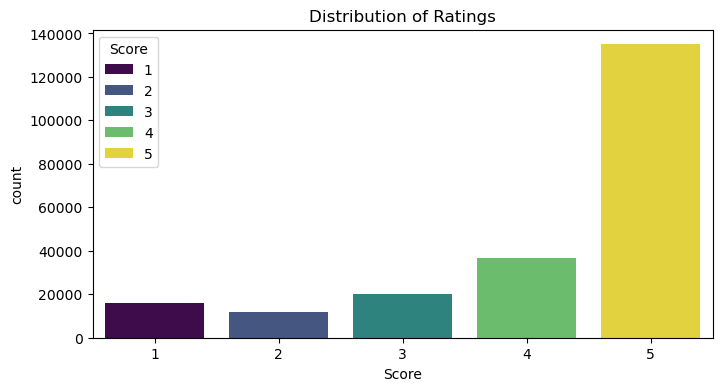

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(x='Score', data=df, palette='viridis', hue="Score")
plt.title('Distribution of Ratings')
plt.show()

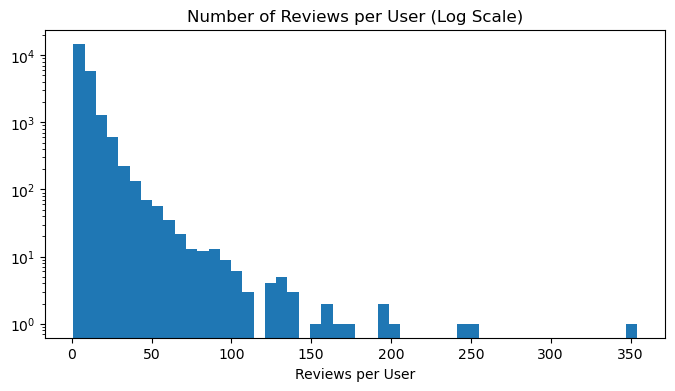

In [7]:
# Reviews per user (log scale)
user_counts = df['UserId'].value_counts()
plt.figure(figsize=(8,4))
plt.hist(user_counts, bins=50, log=True)
plt.title('Number of Reviews per User (Log Scale)')
plt.xlabel('Reviews per User')
plt.show()

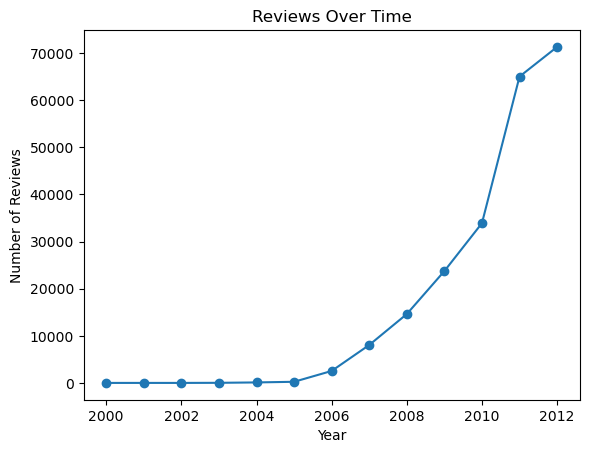

In [9]:
# Reviews over time
df['Year'] = df['Time'].dt.year
yearly_reviews = df.groupby('Year').size()
yearly_reviews.plot(title='Reviews Over Time', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

In [11]:
df["review_length"] = df["Text"].apply(lambda x: len(str(x).split()))
print(df["review_length"].describe())

count    219540.000000
mean         92.644379
std          92.579526
min           7.000000
25%          37.000000
50%          64.000000
75%         115.000000
max        3432.000000
Name: review_length, dtype: float64


In [15]:
import nltk
nltk.download('stopwords')  
nltk.download('wordnet')    
nltk.download('omw-1.4')    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [21]:
import pandas as pd
import re
import contractions
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text):
        return ""
    # Remove HTML
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Fix contractions
    text = contractions.fix(text)
    # Remove special chars
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase
    text = text.lower()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)


tqdm.pandas(desc="Cleaning Text")
df['CleanText'] = df['Text'].progress_apply(clean_text)
df['CleanSummary'] = df['Summary'].progress_apply(clean_text)

# Save
df.to_csv(r'D:\DATA SCIENCE\Amazon Data Set\preprocessed_amazon_reviews.csv', index=False)
print("Preprocessing complete!")

Cleaning Text:   0%|          | 0/219540 [00:00<?, ?it/s]C:\Users\Admin\AppData\Local\Temp\ipykernel_9720\3838333010.py:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
Cleaning Text: 100%|██████████| 219540/219540 [00:14<00:00, 15280.97it/s]


Preprocessing complete!


In [23]:
print(df[['Text', 'CleanText']].head())

                                                Text  \
0  good flavor! these came securely packed... the...   
1  The Strawberry Twizzlers are my guilty pleasur...   
2  Twizzlers, Strawberry my childhood favorite ca...   
3  McCann's Instant Oatmeal is great if you must ...   
4  I ordered this for my wife as it was reccomend...   

                                           CleanText  
0  good flavor came securely packed fresh delicio...  
1  strawberry twizzlers guilty pleasure yummy six...  
2  twizzlers strawberry childhood favorite candy ...  
3  mccanns instant oatmeal great must oatmeal scr...  
4  ordered wife reccomended daughter almost every...  
